<a href="https://colab.research.google.com/github/kbarismath/MovieLens-20M-Recommender-System-/blob/main/Recommender_System_w_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# LOADING DATA

In [6]:
df_ratings = pd.read_csv('rating.csv')
df_movies = pd.read_csv('movie.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2.0,3.5,2005-04-02 23:53:47
1,1,29.0,3.5,2005-04-02 23:31:16
2,1,32.0,3.5,2005-04-02 23:33:39
3,1,47.0,3.5,2005-04-02 23:32:07
4,1,50.0,3.5,2005-04-02 23:29:40


In [7]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# EDA

In [8]:
num_ratings = len(df_ratings)
num_movies  = df_ratings['movieId'].nunique() #number of unique movies that has been rated.
num_users   = df_ratings['userId'].nunique()  #number of unique users that has done a rating.

print(f"Number of ratings : {num_ratings}")
print(f"Number of unique movie IDs : {num_movies}")
print(f"Number of unique users : {num_users}")
print(f"Average number of ratings per user : {round(num_ratings/num_users, 2)}")
print(f"Average number of ratings per movies: {round(num_ratings/num_movies, 2)}")


Number of ratings : 3164000
Number of unique movie IDs : 18300
Number of unique users : 21601
Average number of ratings per user : 146.47
Average number of ratings per movies: 172.9


***Movie ratings distribution***

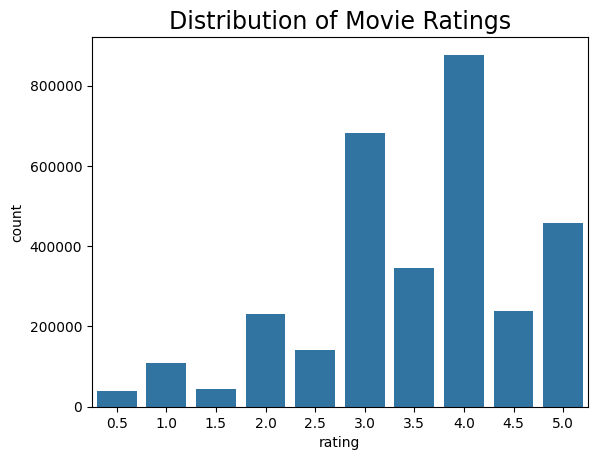

In [9]:
import seaborn as sns

sns.countplot(x='rating', data=df_ratings)
plt.title("Distribution of Movie Ratings", fontsize=17)
plt.show()


***Global mean rating***

In [ ]:
print(f"Global mean rating: {round(df_ratings['rating'].mean(),2)}")

Global mean rating: 3.53


***Mean rating per user***

In [ ]:
mean_ratings = df_ratings.groupby('userId')['rating'].mean()
print(f"Mean ratings per user: {round(mean_ratings.mean(),2)}")

Mean ratings per user: 3.63


***Which movies are the most frequently rated ones?***

In [ ]:
movie_ratings = df_ratings.merge(df_movies, on='movieId')
movie_ratings['title'].value_counts()[0:10] #top 10 most frequently rated

title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
Name: count, dtype: int64

***What are the lowest and highest rated movies?***
*For this, we will use Bayesian Average*


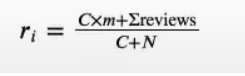

*where C is the average number of ratings for a given movie, m represents the average rating across all movies*

In [ ]:
movie_stats = df_ratings.groupby('movieId')['rating'].agg(['count','mean'])
movie_stats.head()

,count,mean
movieId,,
1,49695,3.921240
2,22243,3.211977
3,12735,3.151040
4,2756,2.861393
5,12161,3.064592


***Now lets define Bayesian Average***

In [ ]:
C = movie_stats['count'].mean() # Average number of ratings for a given movie
m = movie_stats['mean'].mean()  # Average rating for a given movie,

def bayesian_avg(df_ratings):
  bayesian_avg = (C*m+df_ratings.sum())/(C+df_ratings.count())
  return round(bayesian_avg,3)


In [ ]:
bayesian_avg_ratings = df_ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index() #converting series to a df
bayesian_avg_ratings.columns = ['movieId','bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on ='movieId')
movie_stats.head()

,movieId,count,mean,bayesian_avg
0,1,49695,3.921240,3.910
1,2,22243,3.211977,3.209
2,3,12735,3.151040,3.150
3,4,2756,2.861393,2.919
4,5,12161,3.064592,3.069


*One can observe how the mean changed for the given movie. Now lets see which movies are the highest or lowest rated according to bayesian average*

In [ ]:
movie_stats = movie_stats.merge(df_movies[['movieId','title']])
movie_stats.sort_values(by='bayesian_avg', ascending=False)

,movieId,count,mean,bayesian_avg,title
315,318,63366,4.446990,4.432,"Shawshank Redemption, The (1994)"
843,858,41355,4.364732,4.343,"Godfather, The (1972)"
49,50,47006,4.334372,4.316,"Usual Suspects, The (1995)"
523,527,50054,4.310175,4.293,Schindler's List (1993)
1195,1221,27398,4.275641,4.245,"Godfather: Part II, The (1974)"
...,...,...,...,...,...
2298,2383,2155,1.794896,2.140,Police Academy 6: City Under Siege (1989)
1648,1707,2697,1.819985,2.105,Home Alone 3 (1997)
1694,1760,2658,1.770316,2.070,Spice World (1997)
1506,1556,5326,1.912317,2.063,Speed 2: Cruise Control (1997)


In [10]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



*Observe that the column 'genres' is a string that seperates movie genres with "|" We will convert this strin to a list to make it easier to analyze. *

In [11]:
df_movies['genres']= df_movies['genres'].apply(lambda x: x.split('|'))
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [12]:
from collections import Counter
genre_frequency =  Counter(g for genres in df_movies['genres']for g in genres)
print(f"There are {len(genre_frequency)} genres")

There are 20 genres


***Visualise genres popularity***

<ipython-input-13-7193cda30ac9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False), palette='magma')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Romance'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Sci-Fi'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Fantasy'),
  Text(12, 0, 'War'),
  Text(13, 0, 'Children'),
  Text(14, 0, 'Musical'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'Film-Noir'),
  Text(18, 0, '(no genres listed)'),
  Text(19, 0, 'IMAX')])

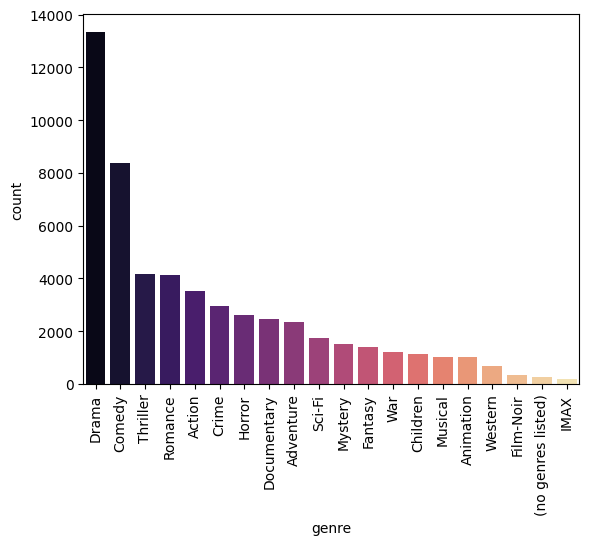

In [13]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False), palette='magma')
plt.xticks(rotation=90)

In [22]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))


The 5 most common genres: 
 [('Drama', 13344), ('Comedy', 8374), ('Thriller', 4178), ('Romance', 4127), ('Action', 3520)]


# DATA PREPROCESSING

***We need to transform our data into a utility matrix where rows represent users and columns represent movies. ***

The create_X() function outputs a matrix X with four mapper dictionaries (which we need to map the utility matrix to user and movie IDs)


*   user_mapper: maps user id to user index
*   movie_mapper: maps movie id to movie index
*   user_inv_mapper: reverse
*   movie_inv_mapper: reverse




***Matrix Factorization***

In [27]:
from scipy.sparse import csr_matrix

def create_X(df):
  #M users and N items. We create a mxn utility matrix
  df_cleaned = df.dropna(subset=['movieId'])

  M = df_cleaned['userId'].nunique()
  N = df_cleaned['movieId'].nunique()

  user_mapper = dict(zip(np.unique(df_cleaned["userId"]), list(range(M))))
  movie_mapper = dict(zip(np.unique(df_cleaned["movieId"]), list(range(N))))
  #array
  user_inv_mapper = dict(zip(list(range(M)),np.unique(df_cleaned["userId"])))
  movie_inv_mapper = dict(zip(list(range(N)),np.unique(df_cleaned["movieId"])))

  user_index = [user_mapper[i] for i in df_cleaned['userId']]
  item_index = [movie_mapper[i] for i in df_cleaned['movieId']]

  X = csr_matrix((df_cleaned["rating"], (user_index, item_index)), shape=(M,N))

  return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(df_ratings)




In [28]:
X.shape

(21601, 18300)

***Now, we need to evaluate the sparsity of our utility matrix to understand if we can use Collaborative Filtering .***

sparsity = num_zero_values / num_total_elements

In [29]:
num_total = X.shape[0] * X.shape[1]
n_ratings = X.nnz # csr_matrix.nnz counts the number of stored non-empty elements in the matrix
n_zero_valued = num_total - n_ratings
sparsity = n_zero_valued / num_total

print(f"Matrix sparsity : {round(sparsity*100,2)} %")


Matrix sparsity : 99.2 %


***Our matrix is sparse.***
***To identify the Cold Start Problem, its useful to check which users and movies have few interactions***

In [30]:
n_ratings_per_user = X.getnnz(axis=1)
print(f"Most active user rated {n_ratings_per_user.max()} movies")
print(f"Least active user rated {n_ratings_per_user.min()} movies")


Most active user rated 7515 movies
Least active user rated 20 movies


In [31]:
n_ratings_per_movie = X.getnnz(axis=0)
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings")


Most rated movie has 10623 ratings
Least rated movie has 1 ratings


Lets plot these insights

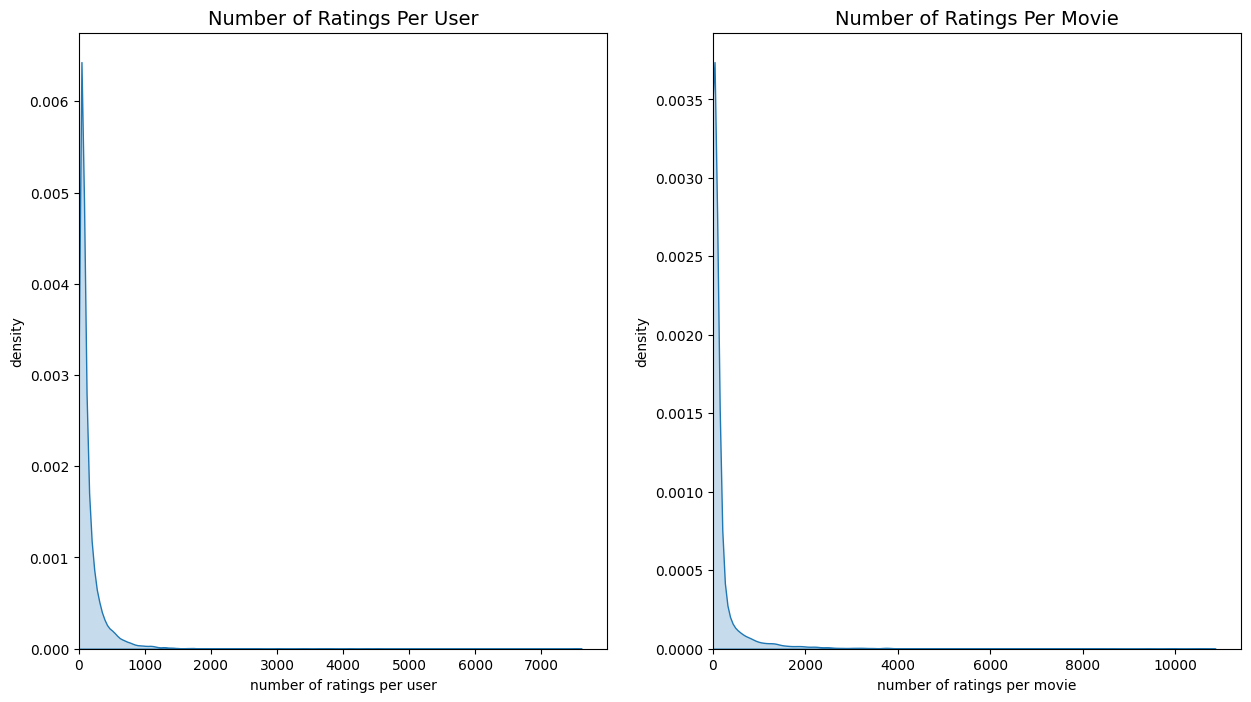

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

# ITEM-BASED RECOMMENDATIONS WITH k-NEAREST NEIGHBORS

***Find the k movies that have the most similar user engagement vectors for movie i***


In [34]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_maper, k, metric='cosine'):
  X=X.T
  neighbor_ids=[]

  movie_ind = movie_mapper[movie_id]
  movie_vec = X[movie_ind]

  if isinstance(movie_vec, np.ndarray):
    movie_vec = movie_vec.reshape(1,-1)

  # we should use k+1 since kNN output includes the movieId of interest

  kNN = NearestNeighbors(n_neighbors=k+1, algorithm = 'brute', metric=metric)
  kNN.fit(X)

  neighbor = kNN.kneighbors(movie_vec, return_distance=False)

  for i in range(0, k):
    n= neighbor.item(i)
    neighbor_ids.append(movie_inv_mapper[n])

  neighbor_ids.pop(0)

  return neighbor_ids


Lets find similar movies for movie_id 1

In [35]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies


[260.0, 780.0, 1210.0, 1270.0, 356.0, 588.0, 3114.0, 648.0, 480.0]

Lets convert these movie ids to titles using a dictionary that maps movie ids to titles.

In [37]:
movie_titles = dict(zip(df_movies['movieId'], df_movies['title']))
movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k=10)
movie_title = movie_titles[movie_id]

print(f"Because youve watched {movie_title}, we recommend you to watch:")

for i in similar_movies:
  print(movie_titles[i])



Because youve watched Toy Story (1995), we recommend you to watch:
Star Wars: Episode IV - A New Hope (1977)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode VI - Return of the Jedi (1983)
Back to the Future (1985)
Forrest Gump (1994)
Aladdin (1992)
Toy Story 2 (1999)
Mission: Impossible (1996)
Jurassic Park (1993)


# HANDLING THE COLD START PROBLEM
***The issue with Collaborative Filtering is that the new users or items with no iteractions gets excluded from the recommendation system. And as we can see since the sparsity of our utility matrix is large, we have this problem in this dataset. Content-based filtering is a way to handle this problem by generating recommendations based on users previous actions or explicit feedback by recommending other items similar to what the users like***

So to handle the cold-start problem, we start by first converting 'genres' to binary features.

In [ ]:
n_movies = df_movies['movieId'].nunique()
print(f"There are {n_movies} unique movies in our movie dataset")


In [40]:
genres = set(g for G in df_movies['genres'] for g in G)

for g in genres:
  df_movies[g] = df_movies.genres.transform(lambda x: int(g in x))

movie_genres = df_movies.drop(columns=['movieId','title', 'genres'])



In [41]:
movie_genres.head()

,Drama,Sci-Fi,Comedy,Action,Horror,Film-Noir,Mystery,Crime,(no genres listed),Thriller,War,IMAX,Romance,Fantasy,Children,Western,Documentary,Musical,Animation,Adventure
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(movie_genres)


In [43]:
cos_sim[0]

array([1.        , 0.77459667, 0.31622777, ..., 0.4472136 , 0.        ,
       0.51639778])

***Movie Finder Function***

***To get results from our recommender, we need to know the exact title of a movie in our dataset. If we misspell the title or forget to include the year of release, our recommender wont identify which movie we are talking about. Therefore, we will use the package fuzzywuzzy to find the most similar title to the string that we input***

In [45]:
%pip install fuzzywuzzy # colab doesnt use this package anymore

In [51]:
from fuzzywuzzy import process

def movie_finder(title):
  all_titles = df_movies['title'].tolist()
  closest_match= process.extractOne(title, all_titles)
  return closest_match[0]


In [53]:
title = movie_finder('toy stroy')
title

'Toy Story (1995)'

so from now on, if you input 'toy stroy' for example, movie_finder corrects it to Toy Story.


***to get relevant recommendations, we need to find the movie index in the cosine similarity matrix for this, we can create a movie index mapper that maps a movie title to the index that it represenet in the matrix therefore we use a dict***

In [54]:
movie_idx = dict(zip(df_movies['title'], list(df_movies.index)))
idx = movie_idx[title]


***Lets get the top 10 most similar movies to the 'title' ***

In [55]:
n_recommendations = 10
sim_scores = list(enumerate(cos_sim[idx])) #returns a list of tuples of index and sim score
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:n_recommendations+1] # cuz the first one is obv itself.
sim_scores

[(2209, 0.9999999999999999),
 (3027, 0.9999999999999999),
 (3663, 0.9999999999999999),
 (3922, 0.9999999999999999),
 (4790, 0.9999999999999999),
 (10114, 0.9999999999999999),
 (10987, 0.9999999999999999),
 (11871, 0.9999999999999999),
 (13337, 0.9999999999999999),
 (18274, 0.9999999999999999)]

get the first element of all the tuples


In [ ]:
similar_movies = [i[0] for i in sim_scores]
#similar_movies=

In [56]:
print(f"Because youve watched {title}, we recommend you to watch:")
df_movies['title'].iloc[similar_movies]


Because youve watched Toy Story (1995), we recommend you to watch:


260                              Ladybird Ladybird (1994)
780     My Life and Times With Antonin Artaud (En comp...
1210      Seventh Seal, The (Sjunde inseglet, Det) (1957)
1270                           Killing Fields, The (1984)
356                                 I Love Trouble (1994)
588                Snow White and the Seven Dwarfs (1937)
3114                              Five Easy Pieces (1970)
648                                          Eddie (1996)
480                                         Lassie (1994)
Name: title, dtype: object

In [61]:
def content_based_recommend(title_string, n_recommendations=10):
  title = movie_finder(title_string)
  idx = movie_idx[title]
  sim_scores = list(enumerate(cos_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:n_recommendations+1]
  similar_movies = [i[0] for i in sim_scores]
  print(f"Because youve watched {title}, we recommend you to watch:")
  print(df_movies['title'].iloc[similar_movies])



# MOVIE RECOMMENDING
***Call the function content_based_recommend('movie_name',number of recommendations you want)***


In [62]:
content_based_recommend('avengers (2012)',5)


Because youve watched Avengers, The (2012), we recommend you to watch:
7953                            Spider-Man 2 (2004)
11113                       Superman Returns (2006)
13684                              Star Trek (2009)
13876    Transformers: Revenge of the Fallen (2009)
14592                                 Avatar (2009)
Name: title, dtype: object
